## Coding Problem #0601

### "NLP Classification Analysis."

#### Answer the following questions by providing Python code:
#### Objectives:
- Pre-processing of text data.
- Create a TF IDF representation.
- Carry out the predictive analysis using the Naive Bayes algorithm. 

In [15]:
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')               # Turn the warnings off.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Read in data:
Movie review data from Cornell CS department. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [16]:
!wget https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
!tar xvzf review_polarity.tar.gz

--2021-09-01 10:27:53--  https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127238 (3.0M) [application/x-gzip]
Saving to: ‘review_polarity.tar.gz.1’

review_polarity.tar 100%[===================>]   2.98M  13.6MB/s    in 0.2s    

2021-09-01 10:27:53 (13.6 MB/s) - ‘review_polarity.tar.gz.1’ saved [3127238/3127238]

txt_sentoken/neg/cv000_29416.txt
txt_sentoken/neg/cv001_19502.txt
txt_sentoken/neg/cv002_17424.txt
txt_sentoken/neg/cv003_12683.txt
txt_sentoken/neg/cv004_12641.txt
txt_sentoken/neg/cv005_29357.txt
txt_sentoken/neg/cv006_17022.txt
txt_sentoken/neg/cv007_4992.txt
txt_sentoken/neg/cv008_29326.txt
txt_sentoken/neg/cv009_29417.txt
txt_sentoken/neg/cv010_29063.txt
txt_sentoken/neg/cv011_13044.txt
txt_sentoken/neg/cv012_29411.txt
txt_sentoken/n

In [17]:
# Specify the folder and read in the subfolders.
reviews = load_files('txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [18]:
len(my_docs)

2000

In [19]:
with open('features.pickle', 'wb') as f:
    pickle.dump(my_docs, f)
with open('labels.pickle', 'wb') as f:
    pickle.dump(y, f)

In [20]:
with open('features.pickle', 'rb') as f:
    X = pickle.load(f)
    
with open('labels.pickle', 'rb') as f:
    y = pickle.load(f)

In [21]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000, 1000]))

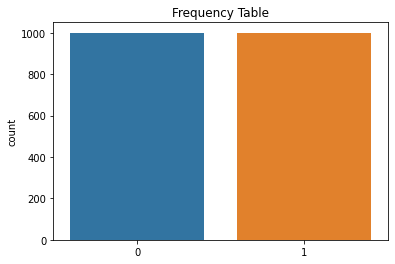

In [22]:
# Visualize the response variable.
sns.countplot(y).set_title("Frequency Table")
plt.show()

1). Carry out the data pre-processing:

In [23]:
corpus = []
stopwords = stopwords.words('english')

for i in range(len(X)):
    
    # Removing all punctuation marks and non characters
    review = re.sub(r'\W', ' ', str(X[i]))
    
    # Converting into lowercase
    review = review.lower()
    
    # Removing b from starting of string
    review = re.sub(r'^b\s+', '', review)
    
    # Removing all single characters
    review = re.sub(r'\s+[a-z]\s+', ' ', review)
    
    # Removing all words which is of length one
    review = re.sub(r'[^a-z]\s+', ' ', review)
    
    # Removing all extra spaces
    review = re.sub(r'\s+', ' ', review)
    
    # Adding cleaned reviews in corpus
    corpus.append(review)

2). Create a TF IDF representation.

In [24]:
vectorizer = TfidfVectorizer(max_features=2000,
                             min_df=3,
                             max_df=0.6,
                             stop_words=stopwords)
tf_idf_model = vectorizer.fit_transform(corpus).toarray()

3). Apply the Naive Bayes algorithm. Calculate the accuracy.

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(tf_idf_model,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1234)

In [33]:
# Training.
NB = GaussianNB()
NB.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
# Testing.
Y_pred = NB.predict(X_test)

#use confusion matrix 
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, Y_pred)
print('Confusion matrix : ', cm)

nbAcc = metrics.accuracy_score(y_test, Y_pred)
print('Accuracy = : ', nbAcc)

Confusion matrix :  [[231  70]
 [ 78 221]]
Accuracy = :  0.7533333333333333


Confusion matrix:


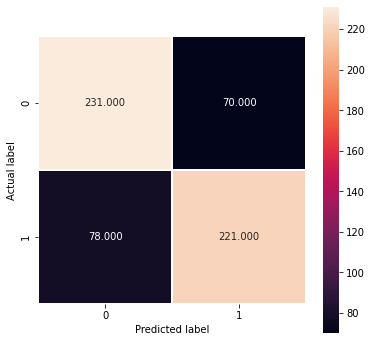

In [35]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")